<a href="https://colab.research.google.com/github/Mayara-alvess/05.projeto-amazon/blob/main/amazonsalees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
df.dtypes

,0
product_id,object
discounted_price,object
actual_price,object
discount_percentage,object
product_name_clean,object
user_id,object
review_id,object
rating_count,float64
user_name_clean,object
review_title_clean,object


## Informações Gerais

In [ ]:
df.head()

,product_id,discounted_price,actual_price,discount_percentage,product_name_clean,user_id,review_id,rating_count,user_name_clean,review_title_clean,review_clean,nova_categoria,new_rating,quartil_percentage,quartil_rating,grau_satisfacao
0,B09ZHCJDP1,499,1000,"0,5",Amazon Basics Wireless Mouse 24 GHz Connectio...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...",23.0,Rambeer kumarRameshDigambar Shelkeawadhesh Kum...,Very responsive and stylish mouseSimply Awesom...,I really like this wireless mouse it has becam...,Computers,5,3,4,Muito Satisfeito
1,B0BQRJ3C47,249,999,"0,75",REDTECH USBC to Lightning Cable 33FT Apple MFi...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,RQXD5SAMMPC6L,NaN,Abdul Gafur,Awesome Product,Quick deliveryAwesome ProductPacking was goodJ...,Computers,5,4,4,Muito Satisfeito
2,B0BP7XLX48,399,1999,"0,8",Syncwire LTG to USB Cable for Fast Charging Co...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...",5.0,Amazon Customerkamal sahotaPankajluvsmplctykanta,GoodSuperb qualityGood products nice oneWorki...,Product is good in quality Working good with m...,Computers,5,4,4,Muito Satisfeito
3,B0B53DS4TF,4995,20049,"0,75",Instant Pot Air Fryer Vortex 2QT Touch Control...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...",3964.0,nikhilRituja RayPrasan Krishnan KarthikeyanAma...,Loved itGood productGood productIts easy to us...,I have used multiple air fryers But this one i...,Home&Kitchen,"4,8",4,4,Muito Satisfeito
4,B0BQ3K23Y1,279,499,"0,44",Oratech Coffee Frother electric milk frother e...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...",28.0,Amazon CustomerNeha MehtaNischal Agarwaltharan...,Oratech Best Coffee FrotherGreatMy review abou...,Overall I love this Oratech Coffee frother and...,Home&Kitchen,"4,8",2,4,Muito Satisfeito


In [ ]:
#Alterando para float#
df['discounted_price'] = df['discounted_price'].str.replace(',', '.').astype(float)
df['actual_price'] = df['actual_price'].str.replace(',', '.').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace(',', '.').astype(float)
df['new_rating'] = df['new_rating'].str.replace(',', '.').astype(float)

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating_count,new_rating,quartil_percentage,quartil_rating
count,1350.000000,1350.000000,1350.000000,1348.000000,1350.000000,1350.000000,1350.000000
mean,3305.703089,5692.874533,0.467015,17656.847923,4.091852,2.498519,2.498519
std,7176.565121,11222.739126,0.216130,42158.843602,0.297444,1.118447,1.118447
min,39.000000,39.000000,0.000000,2.000000,2.000000,1.000000,1.000000
25%,349.000000,899.000000,0.310000,1107.500000,3.900000,1.250000,1.250000
50%,896.000000,1782.500000,0.490000,4740.000000,4.100000,2.000000,2.000000
75%,2176.500000,4582.500000,0.620000,16051.500000,4.300000,3.000000,3.000000
max,77990.000000,139900.000000,0.940000,426973.000000,5.000000,4.000000,4.000000


## Tipos de Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1350 non-null   object 
 1   discounted_price     1350 non-null   float64
 2   actual_price         1350 non-null   float64
 3   discount_percentage  1350 non-null   float64
 4   product_name_clean   1350 non-null   object 
 5   user_id              1350 non-null   object 
 6   review_id            1350 non-null   object 
 7   rating_count         1348 non-null   float64
 8   user_name_clean      1350 non-null   object 
 9   review_title_clean   1350 non-null   object 
 10  review_clean         1350 non-null   object 
 11  nova_categoria       1350 non-null   object 
 12  new_rating           1350 non-null   float64
 13  quartil_percentage   1350 non-null   int64  
 14  quartil_rating       1350 non-null   int64  
 15  grau_satisfacao      1350 non-null   o

In [ ]:
df.isnull().sum()

,0
product_id,0
discounted_price,0
actual_price,0
discount_percentage,0
product_name_clean,0
user_id,0
review_id,0
rating_count,2
user_name_clean,0
review_title_clean,0


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

,0
product_id,0
discounted_price,0
actual_price,0
discount_percentage,0
product_name_clean,0
user_id,0
review_id,0
rating_count,0
user_name_clean,0
review_title_clean,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1349
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1348 non-null   object 
 1   discounted_price     1348 non-null   float64
 2   actual_price         1348 non-null   float64
 3   discount_percentage  1348 non-null   float64
 4   product_name_clean   1348 non-null   object 
 5   user_id              1348 non-null   object 
 6   review_id            1348 non-null   object 
 7   rating_count         1348 non-null   float64
 8   user_name_clean      1348 non-null   object 
 9   review_title_clean   1348 non-null   object 
 10  review_clean         1348 non-null   object 
 11  nova_categoria       1348 non-null   object 
 12  new_rating           1348 non-null   float64
 13  quartil_percentage   1348 non-null   int64  
 14  quartil_rating       1348 non-null   int64  
 15  grau_satisfacao      1348 non-null   object

## Instalando bibliotecas para processamento de linguagem natural (NLP).

In [ ]:
!pip install langdetect
!pip install textblob
!pip install unidecode
!pip install nltk


In [ ]:
import re
from langdetect import detect
import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

## Análise de sentimento

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

# Detectar idioma antes de limpar o texto
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Aplicar a detecção de linguagem e filtrar para apenas reviews em inglês
df = df[df['review_clean'].apply(detect_language) == 'en']

# Limpar texto
def clean_text(text):
    # Adicionar espaço após cada vírgula
    text = re.sub(r',', ', ', text)

    # Remover links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remover datas
    text = re.sub(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b', '', text)

    # Remover valores monetários
    text = re.sub(r'$\d+(?:\.\d+)?|\d+(?:\.\d+)?\s?USD', '', text)

    # Remover valores numéricos
    text = re.sub(r'\b\d+\b', '', text)

    # Remover caracteres especiais
    text = re.sub(r'[^\w\s]', '', text)

    # Converter letras para minúsculo
    text = text.lower()

    # Remover acentos
    text = unidecode.unidecode(text)

    # Remover stop words (palavras comuns que não carregam muito significado, como "and", "the", etc.)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Aplicando lematização, que reduz palavras à sua forma básica.
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

# Aplicando a função de limpeza para review)clean'
df['review_clean_c'] = df['review_clean'].apply(clean_text)

# Inicializar o SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Aplicando a análise de sentimento à coluna 'review_clean'
df['score_sentimento'] = df['review_clean'].apply(analyze_sentiment)

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,product_id,discounted_price,actual_price,discount_percentage,product_name_clean,user_id,review_id,rating_count,user_name_clean,review_title_clean,review_clean,nova_categoria,new_rating,quartil_percentage,quartil_rating,grau_satisfacao,review_clean_c,score_sentimento
0,B09ZHCJDP1,499.0,1000.0,0.50,Amazon Basics Wireless Mouse 24 GHz Connectio...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...",23.0,Rambeer kumarRameshDigambar Shelkeawadhesh Kum...,Very responsive and stylish mouseSimply Awesom...,I really like this wireless mouse it has becam...,Computers,5.0,3,4,Muito Satisfeito,really like wireless mouse became daily driver...,0.9935
2,B0BP7XLX48,399.0,1999.0,0.80,Syncwire LTG to USB Cable for Fast Charging Co...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...",5.0,Amazon Customerkamal sahotaPankajluvsmplctykanta,GoodSuperb qualityGood products nice oneWorki...,Product is good in quality Working good with m...,Computers,5.0,4,4,Muito Satisfeito,product good quality working good phone 7good ...,0.9382
3,B0B53DS4TF,4995.0,20049.0,0.75,Instant Pot Air Fryer Vortex 2QT Touch Control...,"AGXJAYXZKJ6NCPSLX57MXJLQ3F6Q,AEQYSJWBP6DN2IV2L...","R2FHIBV8JE4CTB,R315K0BCU0KVKO,RD129PA7KQQOR,R3...",3964.0,nikhilRituja RayPrasan Krishnan KarthikeyanAma...,Loved itGood productGood productIts easy to us...,I have used multiple air fryers But this one i...,Home&Kitchen,4.8,4,4,Muito Satisfeito,used multiple air fryer one best value moneygo...,0.9980
4,B0BQ3K23Y1,279.0,499.0,0.44,Oratech Coffee Frother electric milk frother e...,"AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...","R3907SDNN9VR5Y,R1NNMXA39722T8,RXQNT49DKJ26S,R2...",28.0,Amazon CustomerNeha MehtaNischal Agarwaltharan...,Oratech Best Coffee FrotherGreatMy review abou...,Overall I love this Oratech Coffee frother and...,Home&Kitchen,4.8,2,4,Muito Satisfeito,overall love oratech coffee frother used soooo...,0.9995
5,B0BR4F878Q,1439.0,1999.0,0.28,Swiffer Instant Electric Water Heater Faucet T...,"AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...","R2WHW4PEF14WOD,R2DCCZWUGI0O0K,R1FA1HH6VL1RAL",53803.0,Yogita gAmazon CustomerMimsy,Best ProductIts expansive but it works well up...,Must buy best Fabulous product I recommend thi...,Home&Kitchen,4.8,1,4,Muito Satisfeito,must buy best fabulous product recommend thisf...,0.9349


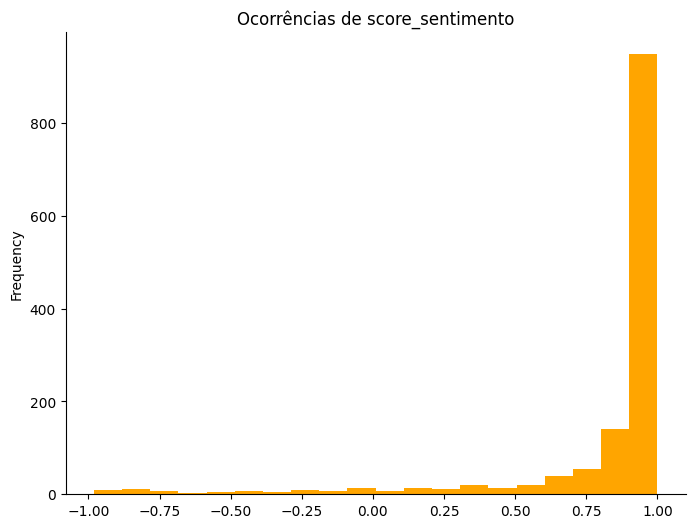

In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(df['score_sentimento'], bins=20, color='orange')
plt.title('Ocorrências de score_sentimento')
plt.ylabel('Frequency')  # Adiciona o rótulo "Frequency" no eixo y
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


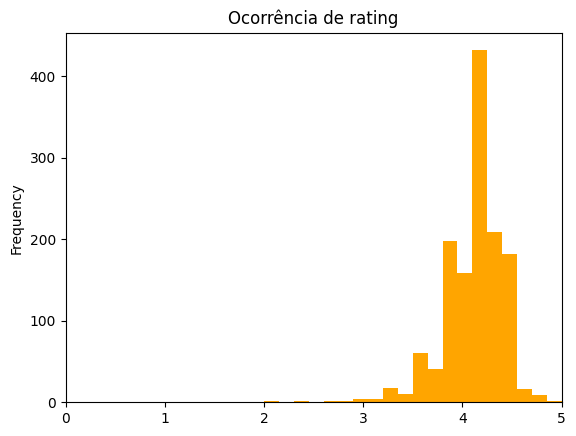

In [ ]:
plt.figure
df['new_rating'].plot(kind='hist', bins=20, title='Ocorrência de rating', color='orange')
plt.xlim(0, 5)  # Define os limites do eixo x
plt.show()


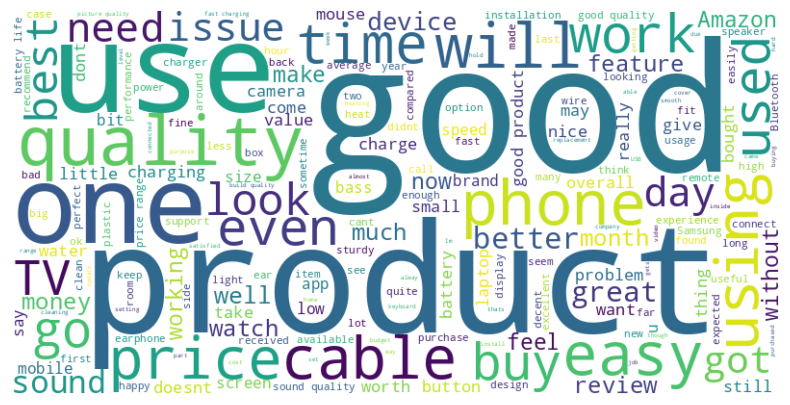

In [ ]:

# Concatenar todas as strings da coluna 'review_clean' em uma única string
text = ' '.join(df['review_clean'].tolist())

# Gerarando a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibindo a word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Teste de Shapiro
Para verificar se os dados seguem uma normalidade ou não.


In [ ]:
# Teste de normalidade
stat, p_valor = shapiro(df['rating_count'])
print("\nTeste de Shapiro-Wilk para rating:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(df['new_rating'])
print("\nTeste de Shapiro-Wilk para NEW_RATING:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(df['actual_price'])
print("\nTeste de Shapiro-Wilk para price:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(df['discount_percentage'])
print("\nTeste de Shapiro-Wilk para percentage:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(df['discounted_price'])
print("\nTeste de Shapiro-Wilk para discount:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)


Teste de Shapiro-Wilk para rating:
Estatística de teste: 0.4067735459146914
p-valor: 1.0897420029870629e-54

Teste de Shapiro-Wilk para NEW_RATING:
Estatística de teste: 0.9262322236600266
p-valor: 3.328401271732374e-25

Teste de Shapiro-Wilk para price:
Estatística de teste: 0.49062027766645955
p-valor: 3.908599430660046e-52

Teste de Shapiro-Wilk para percentage:
Estatística de teste: 0.9829752148140406
p-valor: 1.6684258315204866e-11

Teste de Shapiro-Wilk para discount:
Estatística de teste: 0.46367581619525045
p-valor: 5.431574426630729e-53


Os dados não seguem uma normalidade

## Boxplot

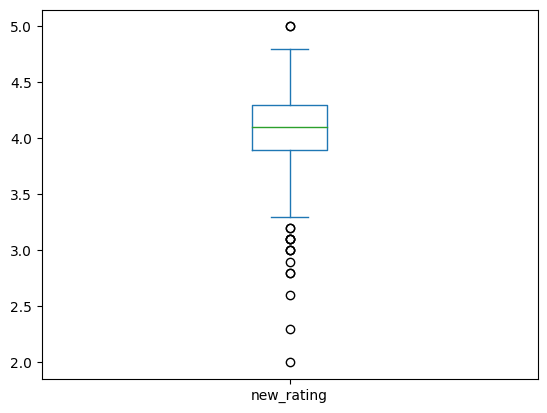

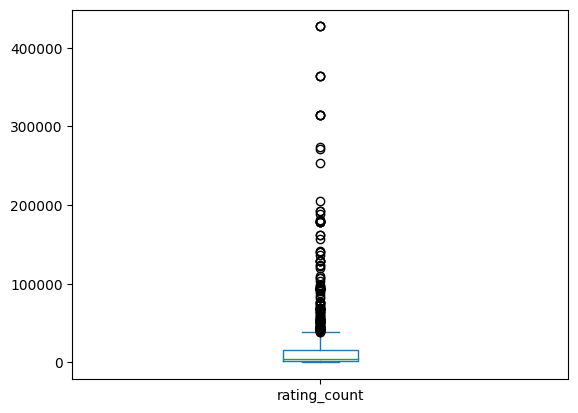

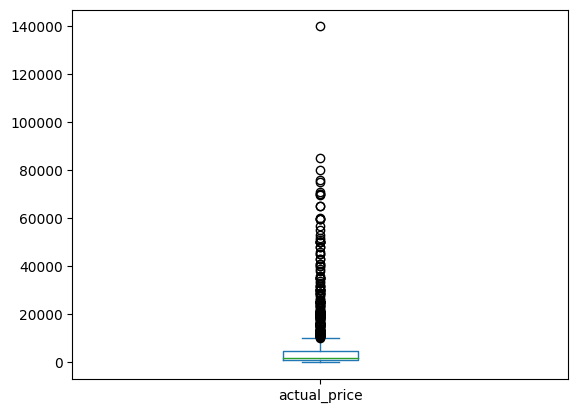

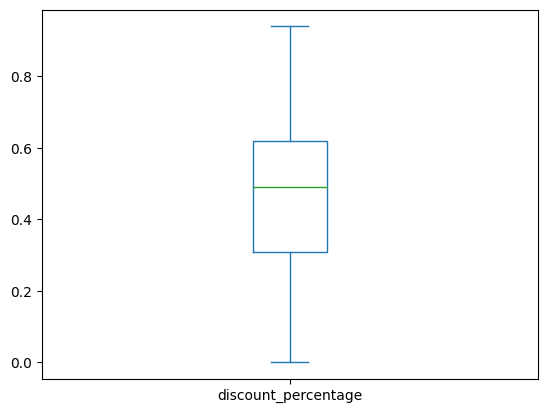

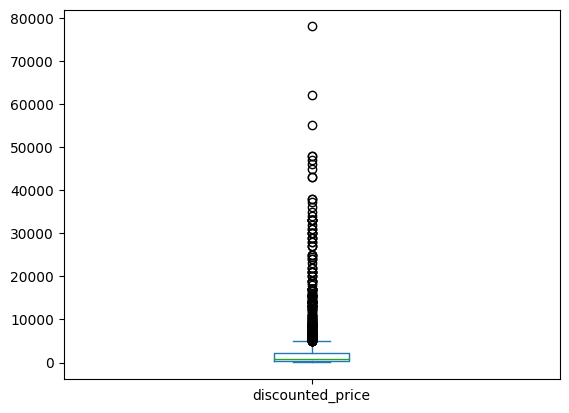

In [ ]:
# boxplot para as varíaveis ##
fig, ax = plt.subplots()
df.new_rating.plot(kind = 'box', ax = ax);
fig, ax = plt.subplots()
df.rating_count.plot(kind = 'box', ax = ax);
fig, ax = plt.subplots()
df.actual_price.plot(kind = 'box', ax = ax);
fig, ax = plt.subplots()
df.discount_percentage.plot(kind = 'box', ax = ax);
fig, ax = plt.subplots()
df.discounted_price.plot(kind = 'box', ax = ax);
fig.show()


## Teste de Spearman
Optei pelo teste de Spearman por duas razões:
Distribuição não normal dos dados: O teste de Shapiro  revelou que eles não seguem uma distribuição normal, o que torna o teste de Pearson inadequado. O teste de Spearman, por outro lado, é robusto à violação da normalidade, fornecendo resultados mais confiáveis.
E pela presença de outliers, o teste de Spearman, oferece maior confiabilidade na análise mesmo na presença de outliers.

In [ ]:

# Calculando o coeficiente de correlação de Spearman e o valor p entre as colunas
correlation, p_value = stats.spearmanr(df["new_rating"], df["discount_percentage"])
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Spearman: -0.14982380175314391
Valor p: 3.259031128486439e-08


In [ ]:

# Calculando o coeficiente de correlação de Spearman e o valor p entre as colunas
correlation, p_value = stats.spearmanr(df["new_rating"], df["rating_count"])
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Spearman: 0.19325398701303323
Valor p: 8.28686412616828e-13


In [ ]:
# Calculando o coeficiente de correlação de Spearman e o valor p entre as colunas
correlation, p_value = stats.spearmanr(df["new_rating"], df["discounted_price"])
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Spearman: 0.07681203504941429
Valor p: 0.004776740854166523


In [ ]:

# Calculando o coeficiente de correlação de Spearman e o valor p entre as colunas
correlation, p_value = stats.spearmanr(df["new_rating"], df["score_sentimento"])
print("Coeficiente de Correlação de Spearman:", correlation)
print("Valor p:", p_value)

Coeficiente de Correlação de Spearman: 0.2471604419349042
Valor p: 3.2809684251036406e-20


## Hipótese 1
### Quanto maior o desconto, melhor será a pontuação.

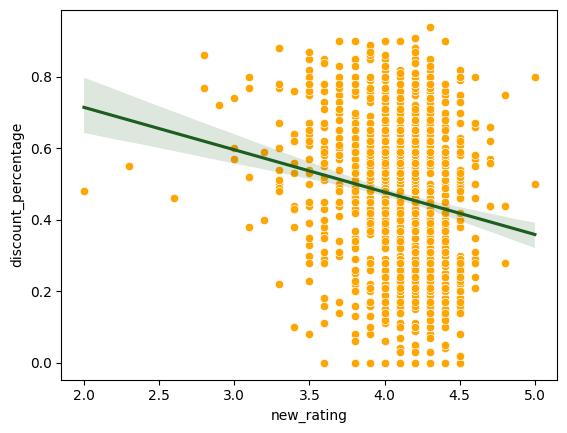

Correlação: -0.14982380175314391
Valor p: 3.259031128486439e-08


In [ ]:
from scipy.stats import spearmanr
sns.scatterplot(data=df, x='new_rating', y='discount_percentage',color='orange')
sns.regplot(data=df, x='new_rating', y='discount_percentage', scatter=False, color='#1B5E20')
plt.show()
correlation, p_value = spearmanr(df["new_rating"], df["discount_percentage"])
print(f'Correlação: {correlation}')
print(f'Valor p: {p_value}')

A correlação negativa fraca indica que produtos com maior desconto tendem a ter uma classificação um pouco baixa. O p valor indica que é estatisticamente significativa, portando rejeitamos H0 e embora a correlação seja fraca, há uma relação negativa entre a porcentagem de desconto e a classificação do produto.

In [ ]:
x = df['discount_percentage']
y = df['new_rating']

Fitar o modelo, chamando o OLS para pegar os dados e aprender com eles e me dar qual é a melhor reta que passaria no meio dos dados.

In [ ]:
#fit modelo linear
model = ols('new_rating ~ discount_percentage', data=df).fit()

In [ ]:
model.resid.mean()

-9.192778421109902e-15

Quanto mais proximo da linha pontilhada, conseguimos o pré suposto de linearidade, ó grafico abaixo indica que temos uma relação linear.

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

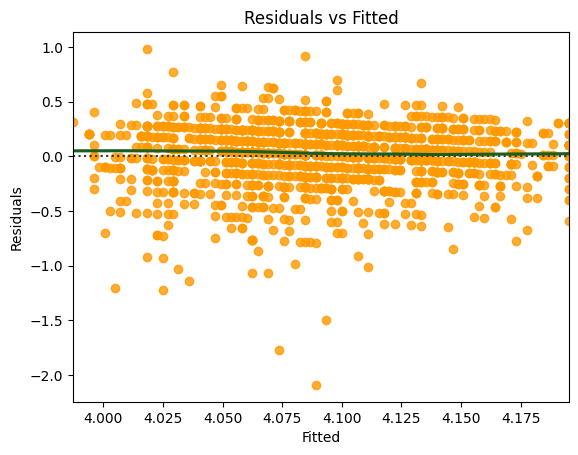

In [ ]:
fig, ax = plt.subplots(1, 1)
fitted_values = model.predict()
residuals = model.resid
sns.residplot(x=fitted_values, y=residuals, lowess=True, color='#FF9900',line_kws={'color': '#1B5E20'})
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')



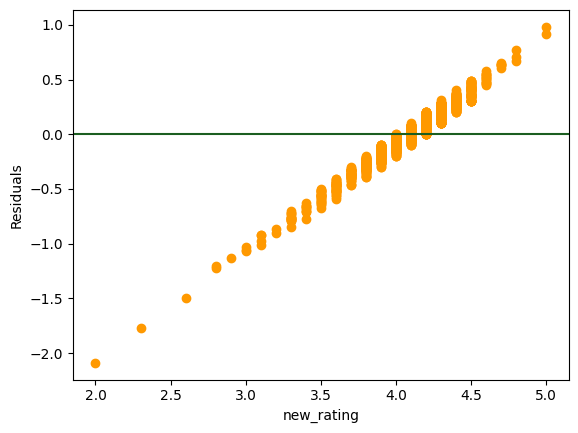

In [ ]:
df_resid = df.copy()
df_resid["residuo"] = model.resid
plt.scatter(df_resid["new_rating"], df_resid["residuo"], color ='#FF9900')
plt.axhline(0, color='#1B5E20')
plt.xlabel('new_rating');
plt.ylabel('Residuals');

In [ ]:
model.resid

,0
0,0.915415
2,0.981825
3,0.770757
4,0.702133
5,0.666714
...,...
1345,-1.204892
1346,-1.224816
1347,-1.493440
1348,-1.773517


Autocorrelação de resíduos


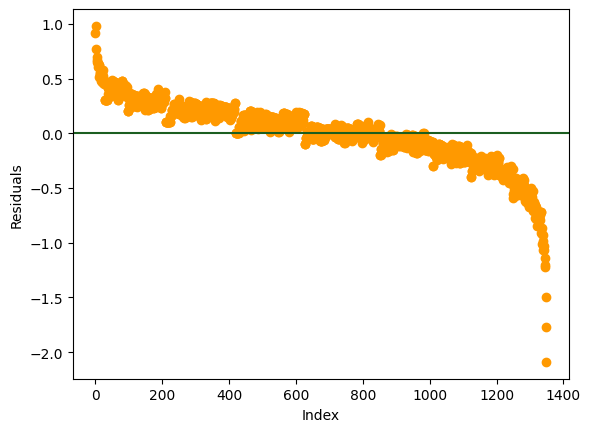

In [ ]:
df_auto = model.resid.reset_index().rename(columns={0: "resid"})
plt.scatter(df_auto["index"] , df_auto["resid"], color='#FF9900')
plt.axhline(0, color='#1B5E20')
plt.xlabel('Index');
plt.ylabel('Residuals');

Teste de Durbin Watson para verificar se há autocorrelação. Se estiver próximo de 2, significa que não há autocorrelação (entre 1 e 3 é aceitável)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

0.034127331042337415

Verificando se os resíduos tem distribuição normal

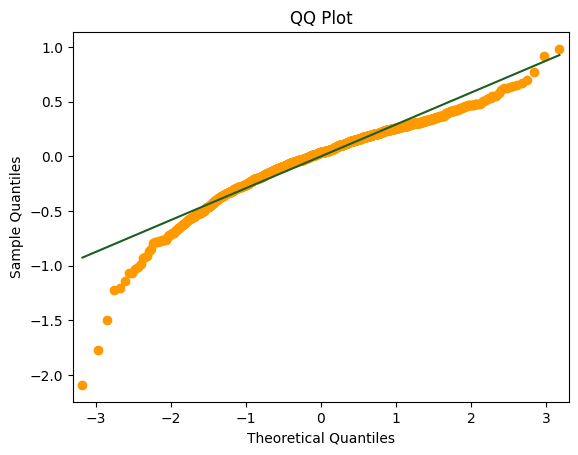

In [ ]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', ax=ax)
points = ax.get_lines()[0]
points.set_markerfacecolor('#FF9900')
points.set_markeredgecolor('#FF9900')
line = ax.get_lines()[1]
line.set_color('#1B5E20')

ax.title.set_text('QQ Plot')

In [ ]:
influence = model.get_influence()

#alavancagem#
leverage = influence.hat_matrix_diag

#residuos padranizados##
standardized_residuals = influence.resid_studentized_internal

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

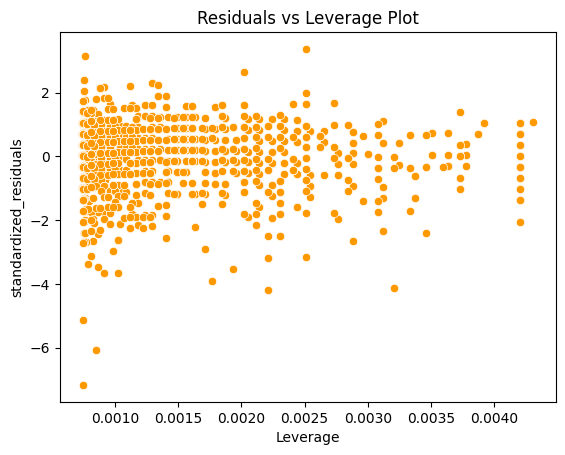

In [ ]:
df_alavancagem = pd.DataFrame()
df_alavancagem['leverage'] = leverage
df_alavancagem['standardized_residuals'] = standardized_residuals

fig = sns.scatterplot(x=df_alavancagem.leverage, y=df_alavancagem.standardized_residuals, color='#FF9900')
fig.set_xlabel('Leverage')
fig.set_title('Residuals vs Leverage Plot')


Nenhum resíduo está alavancando os dados.

In [ ]:
df_alavancagem["standardized_residuals"].describe()

,standardized_residuals
count,1348.000000
mean,0.000006
std,1.000337
min,-7.172788
25%,-0.503497
50%,0.128955
75%,0.671252
max,3.374159


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_rating   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     36.27
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.21e-09
Time:                        14:04:40   Log-Likelihood:                -249.33
No. Observations:                1348   AIC:                             502.7
Df Residuals:                    1346   BIC:                             513.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1953    

O coeficiente de determinação (R-quadrado) é de apenas 0,026. Isso indica que apenas 2,6% da variabilidade na classificação do produto (new_rating) é explicada pela porcentagem de desconto (discount_percentage). Esse valor sugere que a classificação do produto não é um bom preditor para a porcentagem de desconto oferecida.

Por outro lado, o p-valor associado ao teste F é extremamente baixo (2,21e-09). Isso me leva a rejeitar a hipótese nula de que não há relação entre a classificação do produto e a porcentagem de desconto. Em outras palavras, há uma relação estatisticamente significativa entre essas duas variáveis, apesar do baixo R-quadrado.

Entretanto, a baixa explicação da variabilidade (R-quadrado) revela que a correlação entre a classificação do produto e a porcentagem de desconto é fraca. Portanto, embora a relação seja estatisticamente significativa, a classificação do produto não explica muito da variação nos descontos oferecidos.


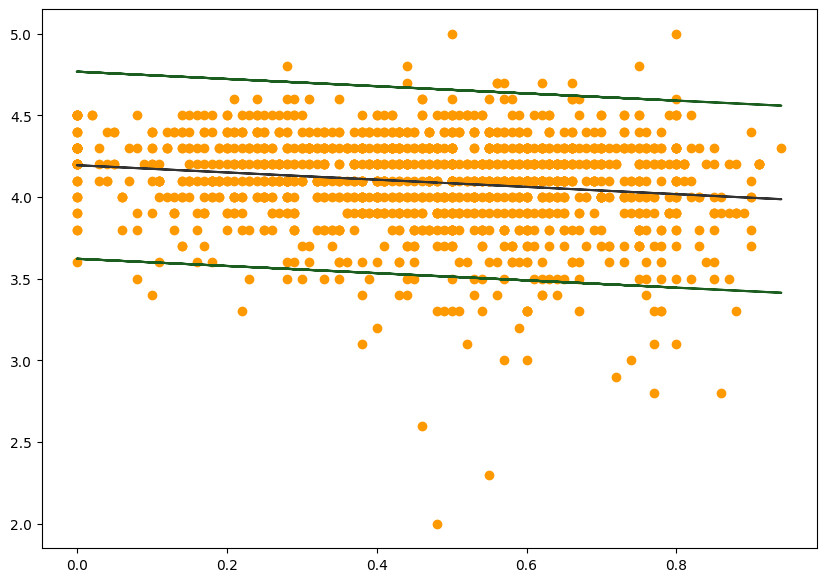

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#intervalo de confiança
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

#cria tamanho da imagem
fig, ax = plt.subplots(figsize=(10,7))

#plota os pontos
ax.plot(x, y, 'o', color='#FF9900', label="data")

#plota linha predito
ax.plot(x, model.predict(), '#333333', label="OLS")

# plot intervalo de confiança
ax.plot(x, confidence_interval_upper, '#1B5E20')
ax.plot(x, confidence_interval_lower, '#1B5E20')


plt.show()

## Hipótese 2
### Quanto maior o número de pessoas que avaliaram o produto, melhor será a classificação.

Correlação de spearmanr

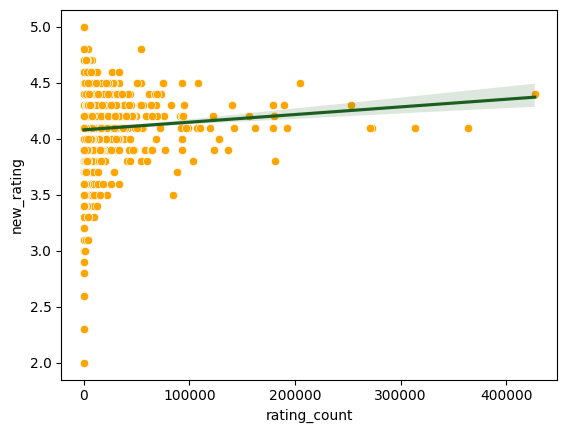

Correlação: 0.19325398701303323
Valor p: 8.28686412616828e-13


In [ ]:
from scipy.stats import spearmanr
sns.scatterplot(data=df, x='rating_count', y='new_rating',color='orange')
sns.regplot(data=df, x='rating_count', y='new_rating', scatter=False, color='#1B5E20')
plt.show()
correlation, p_value = spearmanr(df["rating_count"], df["new_rating"])
print(f'Correlação: {correlation}')
print(f'Valor p: {p_value}')

A correlação entre a classificação do produto e o número de pessoas que votaram é relativamente baixa, indicando uma associação fraca entre essas duas variáveis.
No entanto, o valor p sugere que, apesar da correlação ser fraca, há uma diferença estatisticamente significativa entre as classificações dos produtos com diferentes quantidades de avaliações. Isso indica que produtos com diferentes volumes de avaliações tendem a ter classificações significativamente distintas.

Rejeitamos H0. Há uma correlação significativa

In [ ]:
x = df['rating_count']
y = df['new_rating']

In [ ]:
#fit modelo linear
model = ols('new_rating ~ rating_count', data=df).fit() #fitar um modelo

In [ ]:
model.resid.mean()

-3.4156653766509267e-15

[Text(0.5, 0, 'Fitted'), Text(0, 0.5, 'Residuals')]

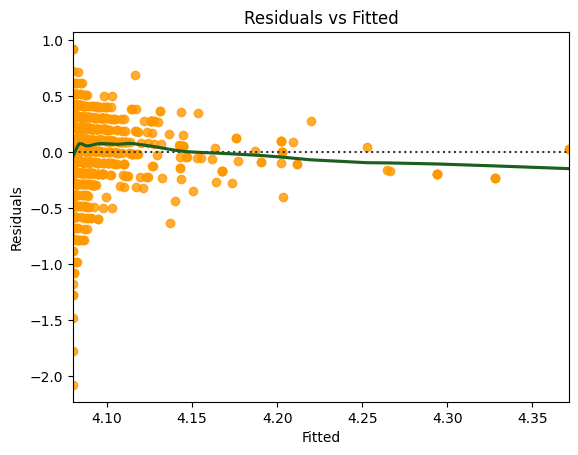

In [ ]:
fig, ax = plt.subplots(1, 1)

fitted_values = model.predict()
residuals = model.resid


sns.residplot(x=fitted_values, y=residuals, lowess=True, color='#FF9900',line_kws={'color': '#1B5E20'})
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted', ylabel='Residuals')

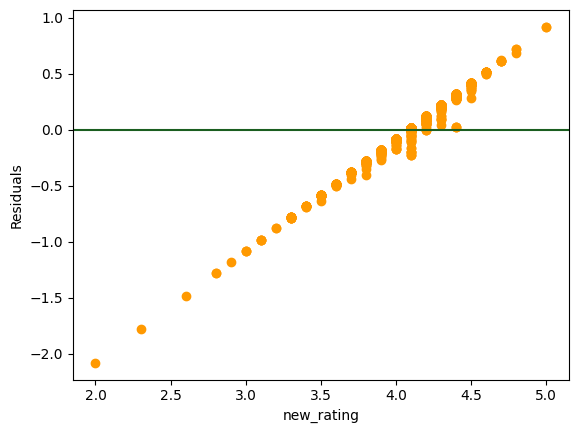

In [ ]:
df_resid = df.copy()
df_resid["residuo"] = model.resid

plt.scatter(df_resid["new_rating"], df_resid["residuo"],color ='#FF9900')
plt.axhline(0, color='#1B5E20')
plt.xlabel('new_rating');
plt.ylabel('Residuals');

In [ ]:
model.resid

,0
0,0.920054
2,0.920067
3,0.717363
4,0.720051
5,0.683327
...,...
1345,-1.279989
1346,-1.280004
1347,-1.479946
1348,-1.779939


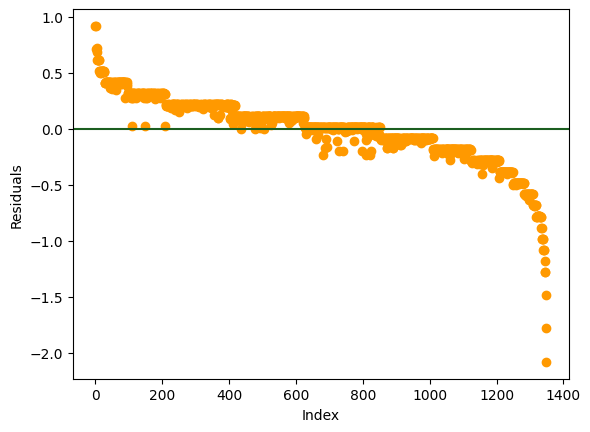

In [ ]:
df_auto = model.resid.reset_index().rename(columns={0: "resid"})

plt.scatter(df_auto["index"] , df_auto["resid"],color='#FF9900')
plt.axhline(0, color='#1B5E20')
plt.xlabel('Index');
plt.ylabel('Residuals');

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

0.021761839025011876

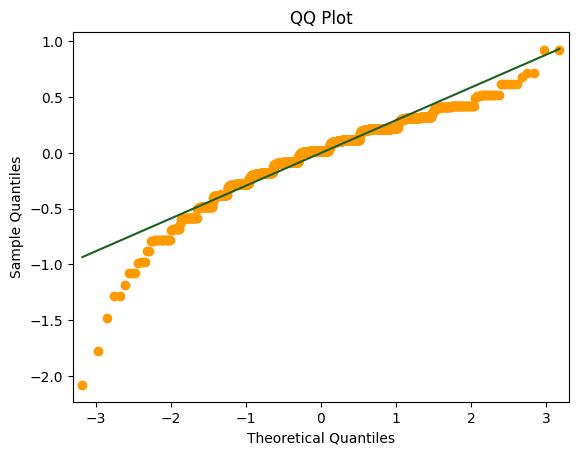

In [ ]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', ax=ax)
points = ax.get_lines()[0]
points.set_markerfacecolor('#FF9900')
points.set_markeredgecolor('#FF9900')
line = ax.get_lines()[1]
line.set_color('#1B5E20')
ax.title.set_text('QQ Plot')

In [ ]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

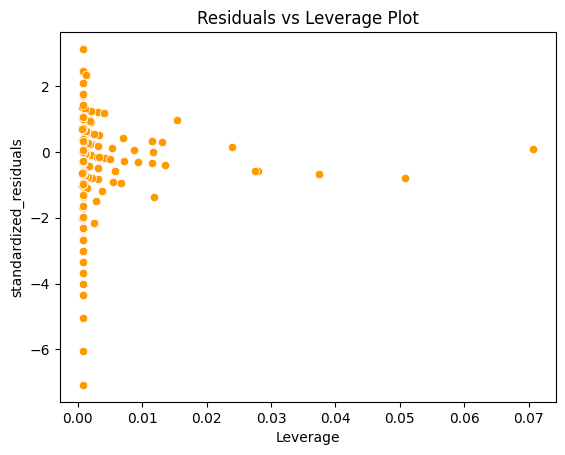

In [ ]:
df_alavancagem = pd.DataFrame()
df_alavancagem['leverage'] = leverage
df_alavancagem['standardized_residuals'] = standardized_residuals

fig = sns.scatterplot(x=df_alavancagem.leverage, y=df_alavancagem.standardized_residuals, color='#FF9900')
fig.set_xlabel('Leverage')
fig.set_title('Residuals vs Leverage Plot')


In [ ]:
df_alavancagem["standardized_residuals"].describe()

,standardized_residuals
count,1348.000000
mean,-0.000093
std,1.000157
min,-7.081517
25%,-0.613078
50%,0.065035
75%,0.726882
max,3.132539


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.93
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           0.000335
Time:                        14:12:10   Log-Likelihood:                -260.81
No. Observations:                1348   AIC:                             525.6
Df Residuals:                    1346   BIC:                             536.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0799      0.009    470.183   

O coeficiente de determinação (R-quadrado) é de apenas 1%. Isso indica que apenas 1% da variabilidade na variável (new_rating) nota do produto, é explicada pela (rating_count)  número de pessoas que classificam o produto.

Já o p valor de 0.0003 é muito baixo, indicando que o coeficiente é estatisticamente significativo, ou seja, há uma evidência significativa de que rating_count tem um efeito na new_rating.

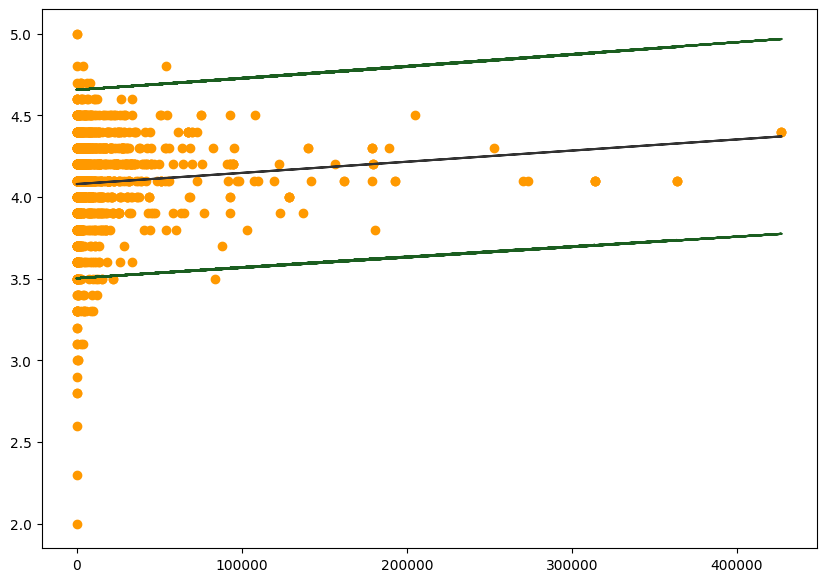

In [ ]:
#intervalo de confiança
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

#cria tamanho da imagem
fig, ax = plt.subplots(figsize=(10,7))

#plota os pontos
ax.plot(x, y, 'o', color='#FF9900', label="data")

#plota linha predito
ax.plot(x, model.predict(), '#333333', label="OLS")

# plot intervalo de confiança
ax.plot(x, confidence_interval_upper, '#1B5E20')
ax.plot(x, confidence_interval_lower, '#1B5E20')



## Hipótese 3
 Quanto maior o número de avaliações positivas utilizando a varíavel (score de sentimento), melhor será a classificação.

In [ ]:

from scipy.stats import mannwhitneyu
# Definindo um ponto de corte para alta e baixa score_sentimento (0.75)
alta_group = df[df['score_sentimento'] > 0.75]['new_rating']
baixa_group = df[df['score_sentimento'] <= 0.75]['new_rating']

# Execute o teste de Mann-Whitney U
estatistica, p_value = mannwhitneyu(alta_group, baixa_group, alternative='two-sided')

# Imprima os resultados
print(f"Mann-Whitney U statistic: {estatistica:.4f}")
print(f"P-value: {p_value:.4f}")

# Verifique se o p-value é significativo
if p_value < 0.05:
    print("A diferença entre os grupos 'alto' e 'baixo' do score de sentimento é estatisticamente significativo.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos 'alto' e 'baixo' do score de sentimento.")


Mann-Whitney U statistic: 168660.0000
P-value: 0.0000
A diferença entre os grupos 'alto' e 'baixo' do score de sentimento é estatisticamente significativo.


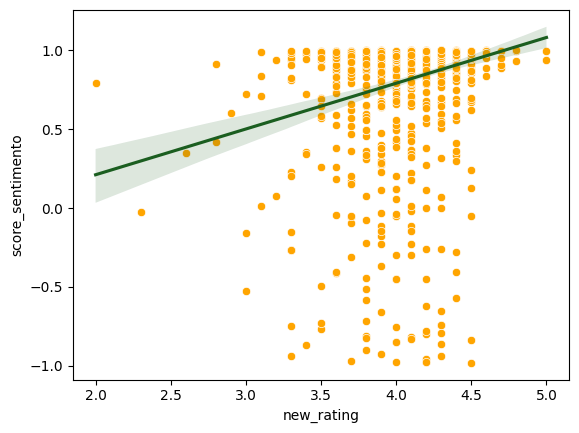

Correlação: 0.2471604419349042
Valor p: 3.2809684251036406e-20


In [ ]:
from scipy.stats import spearmanr
sns.scatterplot(data=df, x='new_rating', y='score_sentimento',color='orange')
sns.regplot(data=df, x='new_rating', y='score_sentimento', scatter=False, color='#1B5E20')
plt.show()
correlation, p_value = spearmanr(df["new_rating"], df["score_sentimento"])
print(f'Correlação: {correlation}')
print(f'Valor p: {p_value}')

De maneira geral, uma correlação de 0,24 é considerada fraca, mas ainda indica que, quando a classificação do sentimento do cliente em relação ao produto aumenta, a pontuação do produto também tende a aumentar. Além disso, com o valor p baixo menor que 0.05, rejeitamos a hipótese nula H₀, o que confirma que há uma diferença estatisticamente significativa entre o score de sentimento e a classificação do produto.

In [ ]:
x = df['score_sentimento']
y = df['new_rating']

In [ ]:
#fit modelo linear
model = ols('new_rating ~ score_sentimento', data=df).fit() #fitar um modelo

In [ ]:
model.resid.mean()

-1.1174707713734513e-15

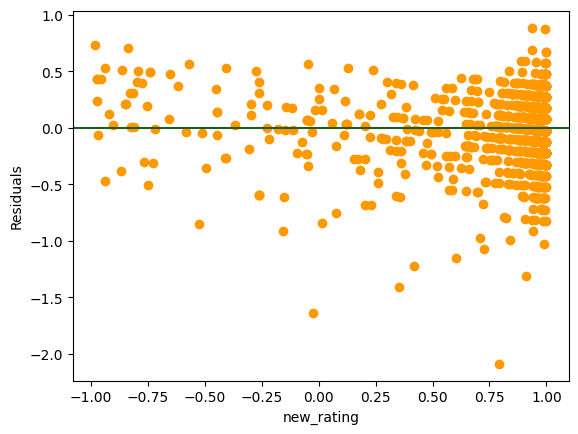

In [ ]:
df_resid = df.copy()
df_resid["residuo"] = model.resid

plt.scatter(df_resid["score_sentimento"], df_resid["residuo"],color ='#FF9900')
plt.axhline(0, color='#1B5E20')
plt.xlabel('new_rating');
plt.ylabel('Residuals');

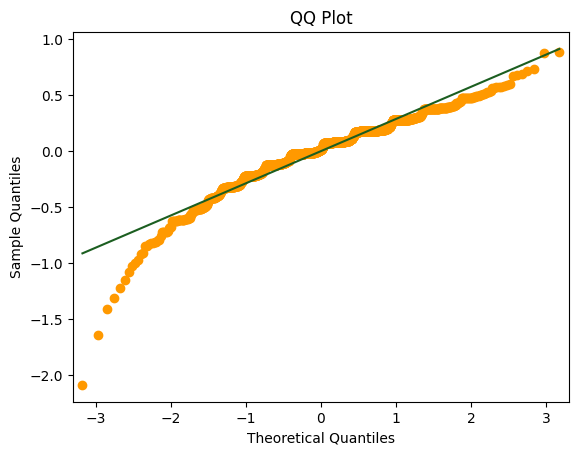

In [ ]:
fig, ax = plt.subplots(1, 1)
sm.ProbPlot(model.resid).qqplot(line='s', ax=ax)
points = ax.get_lines()[0]
points.set_markerfacecolor('#FF9900')
points.set_markeredgecolor('#FF9900')
line = ax.get_lines()[1]
line.set_color('#1B5E20')
ax.title.set_text('QQ Plot')

In [ ]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

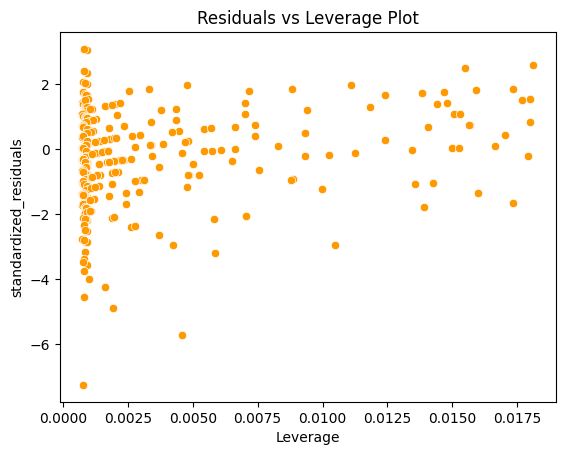

In [ ]:
df_alavancagem = pd.DataFrame()
df_alavancagem['leverage'] = leverage
df_alavancagem['standardized_residuals'] = standardized_residuals

fig = sns.scatterplot(x=df_alavancagem.leverage, y=df_alavancagem.standardized_residuals, color='#FF9900')
fig.set_xlabel('Leverage')
fig.set_title('Residuals vs Leverage Plot')

In [ ]:
df_alavancagem["standardized_residuals"].describe()

,standardized_residuals
count,1348.000000
mean,0.000098
std,1.000655
min,-7.265976
25%,-0.427499
50%,0.050331
75%,0.623058
max,3.085532


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             new_rating   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     75.43
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.08e-17
Time:                        13:49:10   Log-Likelihood:                -230.50
No. Observations:                1348   AIC:                             465.0
Df Residuals:                    1346   BIC:                             475.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9423      0.019  

O modelo indica que há uma relação positiva entre score_sentimento e new_rating, mas o R-squared baixo sugere que o modelo não explica bem a variabilidade na variável dependente. Apesar da significância estatística da relação p valor 0.05, a pequena quantidade de variabilidade explicada pelo modelo pode indicar que outras variáveis importantes não estão incluídas na análise

In [ ]:
#intervalo de confiança
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

#cria tamanho da imagem
fig, ax = plt.subplots(figsize=(10,7))

#plota os pontos
ax.plot(x, y, 'o', color='#FF9900', label="data")

#plota linha predito
ax.plot(x, model.predict(), '#333333', label="OLS")

# plot intervalo de confiança
ax.plot(x, confidence_interval_upper, '#1B5E20')
ax.plot(x, confidence_interval_lower, '#1B5E20')